In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [24]:
data = pd.read_csv("churn.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration 

In [25]:
data.drop('customerID', axis = 'columns' ,inplace = True)

In [26]:
data.shape

(7043, 20)

In [27]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [29]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [30]:
pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull().sum()

11

In [31]:
data[pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [32]:
data1 = data[data.TotalCharges != ' ']
data1.shape

(7032, 20)

In [33]:
pd.to_numeric(data1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

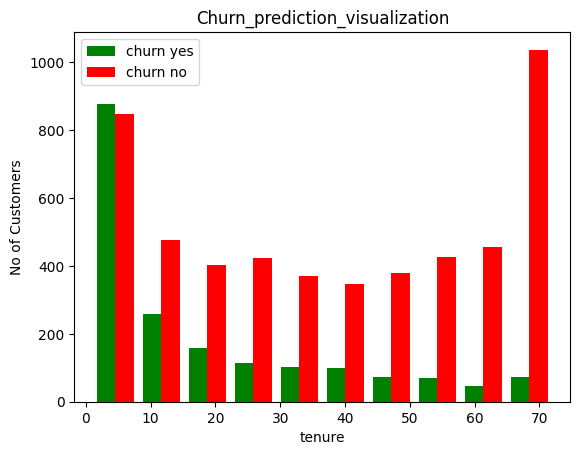

In [34]:
tenure_churn_yes = data1[data1.Churn == 'Yes'].tenure
tenure_churn_No = data1[data1.Churn == 'No'].tenure

plt.xlabel('tenure')
plt.ylabel('No of Customers')
plt.title('Churn_prediction_visualization')
plt.hist([tenure_churn_yes,tenure_churn_No], color=['green','red'],label = ['churn yes','churn no'])
plt.legend()

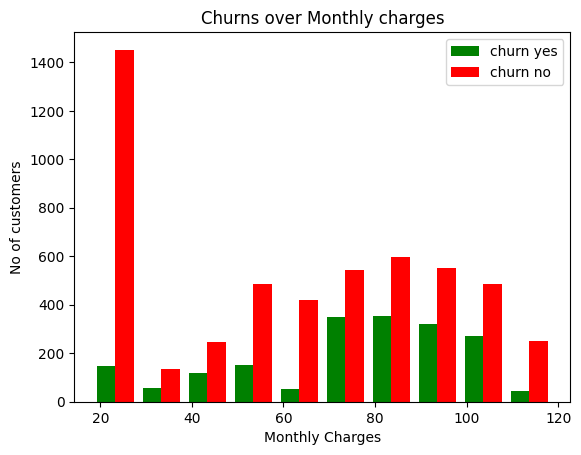

In [35]:
mon_churn_yes = data1[data1.Churn == 'Yes'].MonthlyCharges
mon_churn_no = data1[data1.Churn == 'No'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('No of customers')
plt.title('Churns over Monthly charges')
plt.hist([mon_churn_yes,mon_churn_no], color = ('green','red'), label = ('churn yes','churn no'))
plt.legend()

In [36]:
def unique_in_col(data1):
    for col in data1:
        if data1[col].dtypes == 'object':
            print(f'{col} : {data1[col].unique()}')

In [37]:
unique_in_col(data1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [38]:
data1.replace('No internet service','No', inplace = True)
data1.replace('No phone service','No', inplace = True)

C:\Users\Aman\AppData\Local\Temp\ipykernel_1180\3811300870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No internet service','No', inplace = True)
C:\Users\Aman\AppData\Local\Temp\ipykernel_1180\3811300870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No phone service','No', inplace = True)


In [39]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    data1[col].replace({'Yes':1,'No':0}, inplace = True)



C:\Users\Aman\AppData\Local\Temp\ipykernel_1180\175790933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col].replace({'Yes':1,'No':0}, inplace = True)


In [40]:
data1['gender'].replace({'Female':1, 'Male':0},inplace = True)

C:\Users\Aman\AppData\Local\Temp\ipykernel_1180\2885925882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['gender'].replace({'Female':1, 'Male':0},inplace = True)


In [41]:
for col in data1:
    print(f'{col} : {data1[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


# Onehot Encoding 

In [42]:
finaldata = pd.get_dummies(data = data1, columns=['InternetService','Contract','PaymentMethod'])
finaldata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [43]:
finaldata.tail(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
7042,0,0,0,0,66,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0


In [45]:
col_scaler = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
finaldata[col_scaler] = scaler.fit_transform(finaldata[col_scaler])

In [46]:
finaldata.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [47]:
finaldata.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
68,1,0,1,1,0.690141,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1182,0,0,0,0,0.788732,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
3007,1,1,0,0,0.436620,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1645,1,1,0,0,0.577465,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2976,0,0,0,1,0.253521,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


# Train and Test On Data

In [53]:
x = finaldata.drop('Churn', axis = 'columns')
y = finaldata.Churn

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [54]:
x_train.shape

(5625, 26)

In [55]:
x_test.shape

(1407, 26)

# Deep- Learning model Training 

In [67]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train,y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4781 - accuracy: 0.7694
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7980
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8005
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8039
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8076
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8091
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8085
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4016 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8348
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8386
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8373
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.8372
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8395
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8407
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8377
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8375
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8407
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 

In [68]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 2ms/step - loss: 0.4942 - accuracy: 0.7740


[0.4942462146282196, 0.7739872336387634]

In [69]:
y_pred = model.predict(x_test)
y_pred[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.3568331 ],
       [0.5755944 ],
       [0.00259029],
       [0.762915  ],
       [0.38083902]], dtype=float32)

In [71]:
y_res=[]

for i in y_pred:
    if i > 0.5:
        y_res.append(1)
    else:
        y_res.append(0)

In [75]:
y_res[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

In [76]:
y_test[:10]

C:\Users\Aman\AppData\Local\Temp\ipykernel_1180\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

# Result Accuracy Score

In [83]:
print(classification_report(y_test,y_res))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       999
           1       0.62      0.56      0.59       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407



Text(58.222222222222214, 0.5, 'true value')

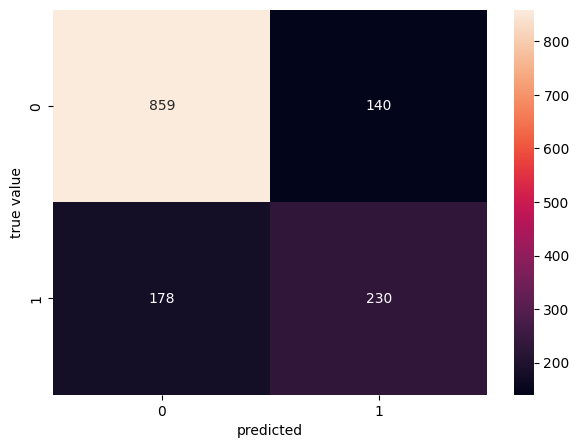

In [87]:
cm = tf.math.confusion_matrix(labels= y_test,predictions= y_res)
plt.figure(figsize= (7,5))
sns.heatmap(cm , annot = True, fmt= 'd')
plt.xlabel('predicted')
plt.ylabel('true value')